In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import numpy as np

from read_data import df


In [72]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [73]:
na_counts = df.isna().sum()
na_counts

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [85]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [70]:
smoke = df[df['smoking'] == 1]
no_smoke = df[df['smoking'] == 0]
male = df[df['sex'] == 1]
female = df[df['sex'] == 0]

In [71]:
female

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12,0
18,70.0,1,125,0,25,1,237000.00,1.0,140,0,0,15,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.00,0.8,141,0,0,257,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0


In [69]:
is_binary = df.isin([0,1]).all().values
bin_names = df.columns[is_binary].tolist()
quant_names = df.columns[~is_binary].tolist()

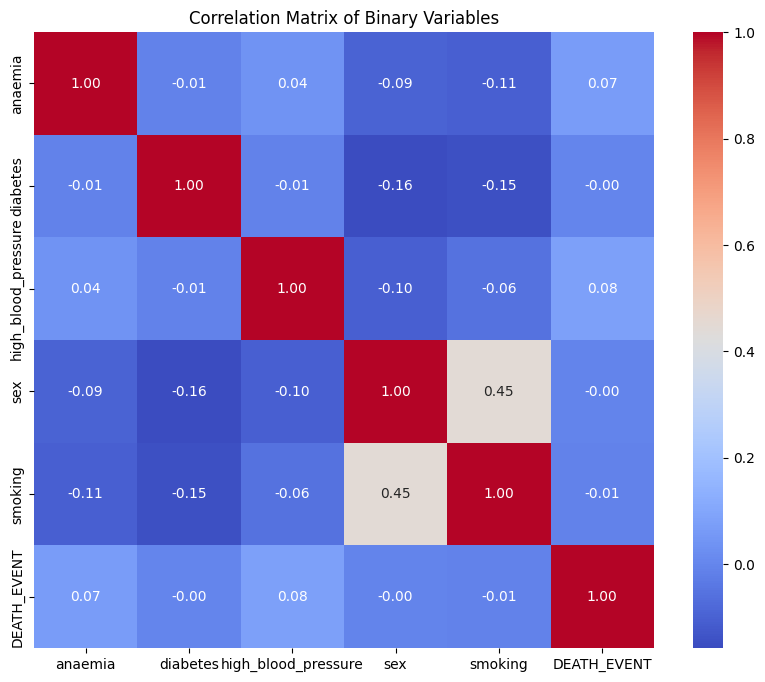

In [68]:
df_binary = df[bin_names]

# Calculating the correlation matrix for binary variables
corr_matrix = df_binary.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Binary Variables")
plt.show()

From this correlation matrix we can see that there is a relationship between sex and smoking, with female composed of the majority of non-smoker. This mean we need to further handling this dependency while we build the model.

In [82]:
y = df['DEATH_EVENT']
X = df.drop(columns = {'DEATH_EVENT', 'time'})

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fitting the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Extracting the summary which includes p-values among other statistics
model_summary = logit_model.summary()

y_pred = logit_model.predict(X_test_sm)
# accuracy = accuracy_score(y_pred, y_test)

# print(f"Accuracy: {accuracy}")

model_summary

Optimization terminated successfully.
         Current function value: 0.482257
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.2312
Time:                        21:58:59   Log-Likelihood:                -100.79
converged:                       True   LL-Null:                       -131.11
Covariance Type:            nonrobust   LLR p-value:                 7.085e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9453      0.193     -4.900      0.000      -1.323      -0.567
x1             0.3764      0.190      1.978      0.048       0.004       0.749
x2             0.3134      0.184      1.701      0.089      -0.048       0.675
x3             0.3988      0.177      2.257      0.024       0.052       0.745
x4             0.2606      0.184      1.417      0.157      -0.100       0.621
x5            -0.8213      0.224     -3.662      0.000      -1.261      -0.382
x6             0.2947      0.181      1.629      0.103      -0.060       0.649
x7            -0.0234      0.184     -0.127      0.899      -0.384       0.338
x8             1.1149      0.332      3.358      0.001       0.464       1.766
x9            -0.1462      0.185     -0.789      0.430      -0.510       0.217
x10           -0.0570      0.207     -0.275      0.783      -0.462       0.348
x11            0.2444      0.193      1.265      0.206      -0.134       0.623
==============================================================================
"""

In [79]:
logit_model

<bound method LikelihoodModelResults.cov_params of <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x16b4edf10>>